In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("student_scores.csv")

In [6]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [9]:
df.shape

(30641, 15)

In [10]:
df.info()
#shows number of values which are not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [11]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [12]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [14]:
#change weekly study hours column
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('05-Oct', '5-10')

In [15]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


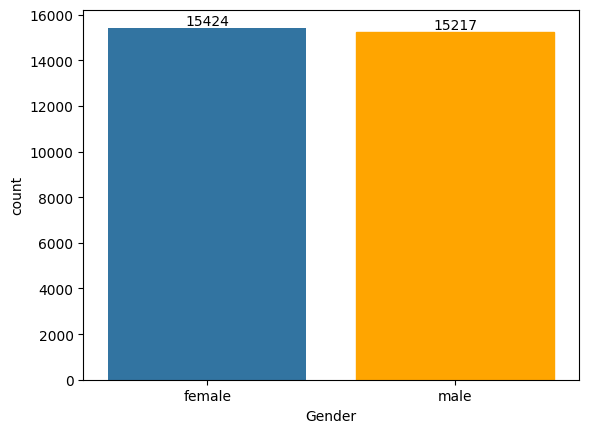

<Figure size 400x300 with 0 Axes>

In [41]:
ax = sns.countplot(data = df, x = 'Gender')
plt.figure(figsize = (4,3))

for bars in ax.containers:
    ax.bar_label(bars)

bar_index_to_change = 1  # Index of the bar you want to change (0-indexed)
new_color = 'orange'  # New color for the bar
bars[bar_index_to_change].set_color(new_color)

plt.show()

#From the above chart we have analyzed that:
#the number of  females in the data is more than the number of males

In [25]:
gb_parentEdu = df.groupby('ParentEduc').agg({"MathScore":'mean', "WritingScore":'mean', 'ReadingScore':'mean'})
print(gb)

                    MathScore  WritingScore  ReadingScore
ParentEduc                                               
associate's degree  68.365586     70.299099     71.124324
bachelor's degree   70.466627     73.331069     73.062020
high school         64.435731     65.421136     67.213997
master's degree     72.336134     76.356896     75.832921
some college        66.390472     68.501432     69.179708
some high school    62.584013     63.632409     65.510785


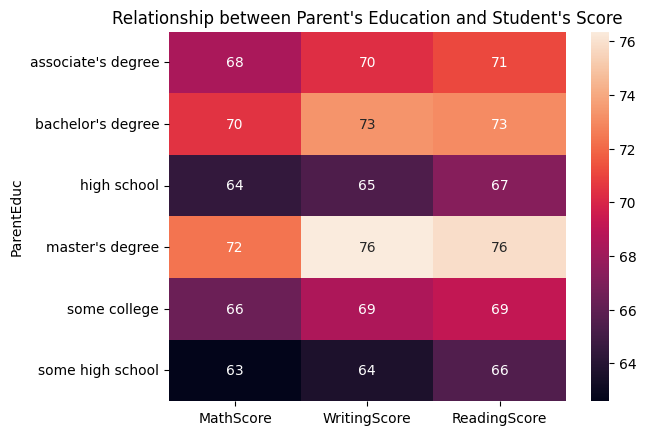

In [38]:
sns.heatmap(gb_parentEdu, annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

From the above chart, it can be concluded that the education of the parents does have an impact on the child's score.

In [27]:
gb_parentMar = df.groupby('ParentMaritalStatus').agg({"MathScore":'mean', "WritingScore":'mean', 'ReadingScore':'mean'})
print(gb_parentMar)

                     MathScore  WritingScore  ReadingScore
ParentMaritalStatus                                       
divorced             66.691197     68.799146     69.655011
married              66.657326     68.420981     69.389575
single               66.165704     68.174440     69.157250
widowed              67.368866     68.563452     69.651438


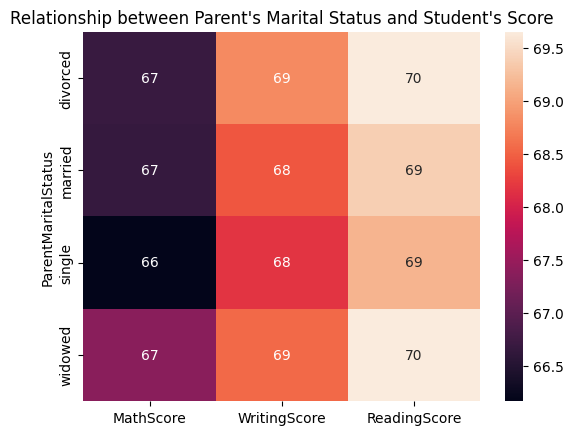

In [39]:
sns.heatmap(gb_parentMar, annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

From the above chart, it can be concluded that the marital status has negligible impact on the child's exam scores.

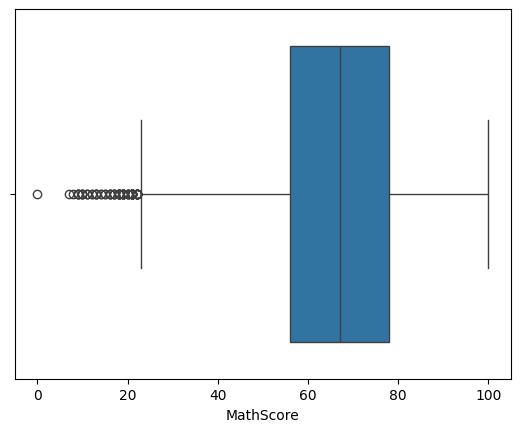

In [45]:
#Detect outliers
sns.boxplot(data = df, x = 'MathScore')
plt.show()

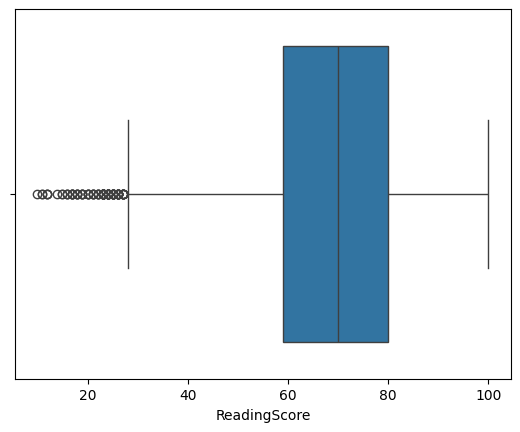

In [46]:
#Detect outliers
sns.boxplot(data = df, x = 'ReadingScore')
plt.show()

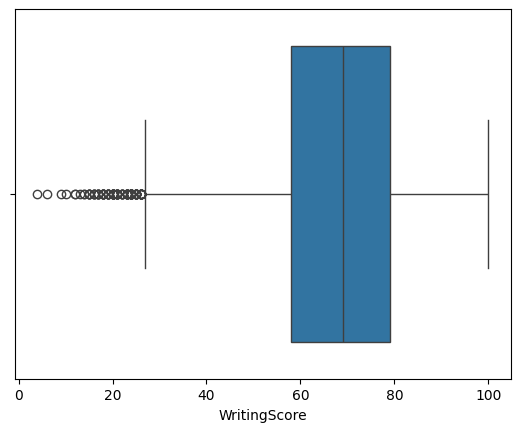

In [47]:
#Detect outliers
sns.boxplot(data = df, x = 'WritingScore')
plt.show()

In [48]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


Distribution of Ethnic Groups

In [60]:
groupA = df.loc[df['EthnicGroup'] == 'group A'].count() #counts the number of students who belong to Group A ethnicity

print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


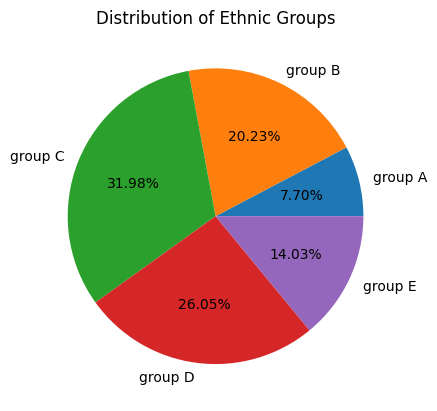

In [68]:
groupB = df.loc[df['EthnicGroup'] == 'group B'].count()
groupC = df.loc[df['EthnicGroup'] == 'group C'].count()
groupD = df.loc[df['EthnicGroup'] == 'group D'].count()
groupE = df.loc[df['EthnicGroup'] == 'group E'].count()

l = ['group A', 'group B', 'group C', 'group D', 'group E']
mlist = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]
plt.pie(mlist, labels = l, autopct = '%1.2f%%')
plt.title('Distribution of Ethnic Groups')
plt.show()

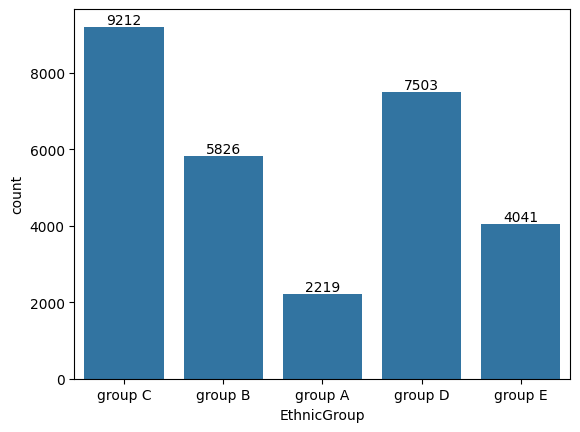

In [71]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
for bars in ax.containers:
    ax.bar_label(bars)

In [75]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

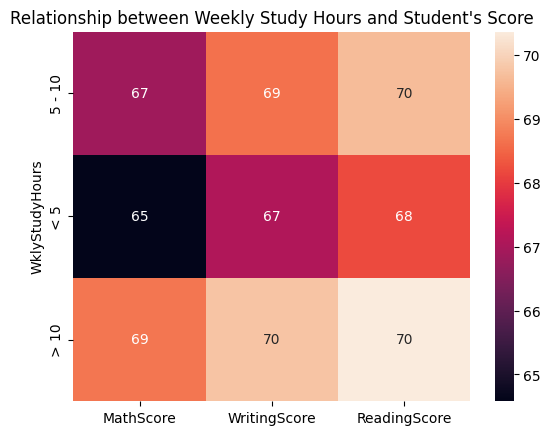

In [76]:
gb_wsh = df.groupby('WklyStudyHours').agg({"MathScore":'mean', "WritingScore":'mean', 'ReadingScore':'mean'})

sns.heatmap(gb_wsh, annot=True)
plt.title("Relationship between Weekly Study Hours and Student's Score")
plt.show()

It can be seen from the graph that the effect of study hours is negligle on the student's score

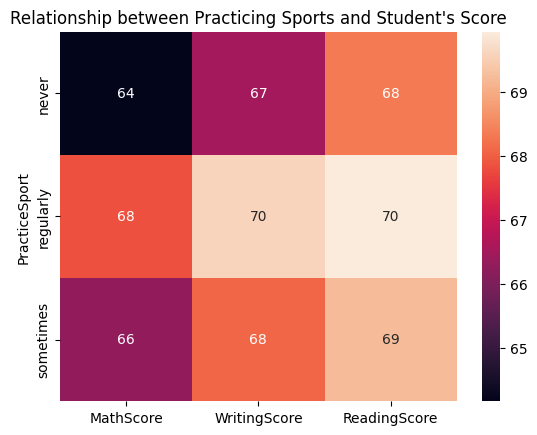

In [77]:
gb_sports = df.groupby('PracticeSport').agg({"MathScore":'mean', "WritingScore":'mean', 'ReadingScore':'mean'})

sns.heatmap(gb_sports, annot=True)
plt.title("Relationship between Practicing Sports and Student's Score")
plt.show()

This visualization shows that the impact of practicing sports on the marks scored by the student is negligible.

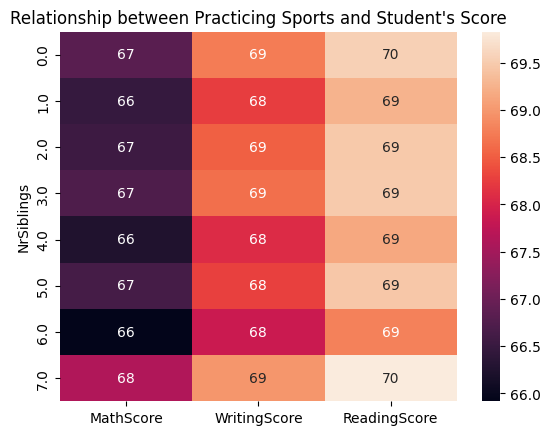

In [78]:
gb_siblings = df.groupby('NrSiblings').agg({"MathScore":'mean', "WritingScore":'mean', 'ReadingScore':'mean'})

sns.heatmap(gb_siblings, annot=True)
plt.title("Relationship between Practicing Sports and Student's Score")
plt.show()

The number of siblings has negligible impact on the child's score.

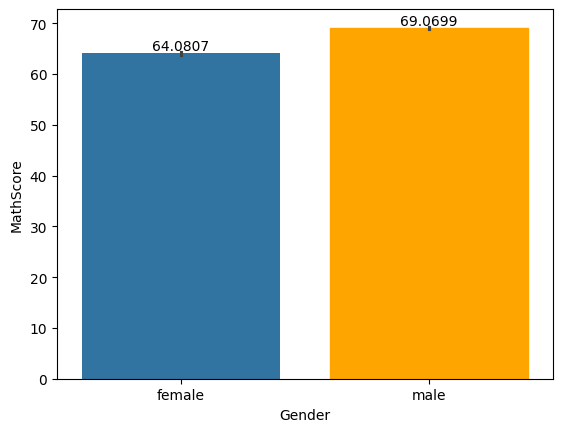

<Figure size 400x300 with 0 Axes>

In [81]:
#Math Score distribution by Gender
ax = sns.barplot(data = df, x = 'Gender', y = 'MathScore')
plt.figure(figsize = (4,3))

for bars in ax.containers:
    ax.bar_label(bars)

bar_index_to_change = 1  # Index of the bar you want to change (0-indexed)
new_color = 'orange'  # New color for the bar
bars[bar_index_to_change].set_color(new_color)

plt.show()

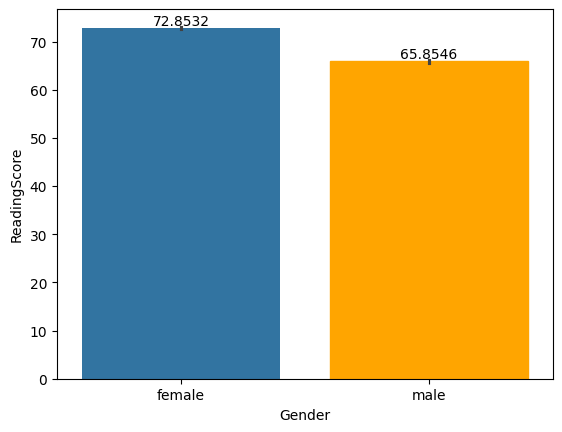

<Figure size 400x300 with 0 Axes>

In [82]:
ax = sns.barplot(data = df, x = 'Gender', y = 'ReadingScore')
plt.figure(figsize = (4,3))

for bars in ax.containers:
    ax.bar_label(bars)

bar_index_to_change = 1  # Index of the bar you want to change (0-indexed)
new_color = 'orange'  # New color for the bar
bars[bar_index_to_change].set_color(new_color)

plt.show()

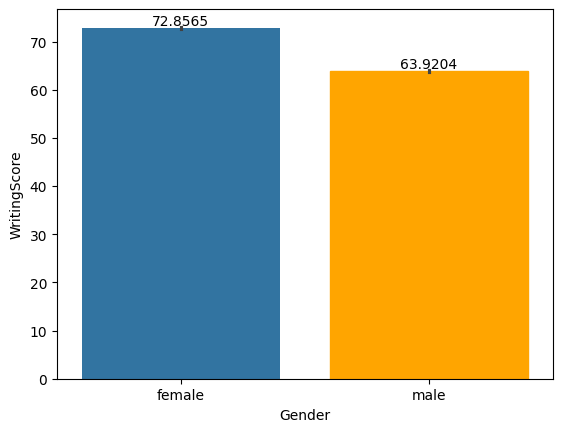

<Figure size 400x300 with 0 Axes>

In [83]:
ax = sns.barplot(data = df, x = 'Gender', y = 'WritingScore')
plt.figure(figsize = (4,3))

for bars in ax.containers:
    ax.bar_label(bars)

bar_index_to_change = 1  # Index of the bar you want to change (0-indexed)
new_color = 'orange'  # New color for the bar
bars[bar_index_to_change].set_color(new_color)

plt.show()

From the charts above it can be seen that females have higher scores in reading and writing than males. Males have higher scores in Math than females. 